**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 


In [154]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random 
import time


In [155]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()


# Print shape of dataset
print("Training: {}".format(trainX.shape))
print("Test: {}".format(testX.shape))


Training: (60000, 28, 28)
Test: (10000, 28, 28)


In [156]:
x_train = trainX.reshape(len(trainX), -1)
x_test = testX.reshape(len(testX), -1)
  

In [157]:
class Kmeans:
    
    
    def __init__(self, k=7, tol=0.01, max_iter=50, algorithm='forgy', distance='euclidean'):
        self.kclusters = k
        self.tolerance = tol
        self.max_iter = max_iter
        self.algorithm = algorithm
        self.distance = distance
    
    
    def GetIndices( self , train ):
        
        if( self.algorithm == "random_part" ):
            indices = np.asarray(random.choices(range(0, self.kclusters), k=train.shape[0]))
        
        if( self.algorithm == 'forgy'  ):
            indices = random.randint(0, len(train)-1)
        
        return indices


    
    def SelectAlgorithm( self, train ):
        
        if( self.algorithm == "random_part" ):
            index = self.GetIndices( train )
            mean_val = []
            for count in range(self.kclusters):
                mean_val.append(train[index == count].mean(axis=0))
            self.centroids = [element[ None, :] for element in mean]
        
        if(  self.algorithm == "forgy" ):
            
            self.centroids = []
            for i in range(self.kclusters):
                index = self.GetIndices( train )
                self.centroids.append(train[index])
    
    
    def MeasureDistance( self ,  train ):
                
        if( self.distance == "manhattan" ):
            for data in train:
                distances = [np.sum(np.abs(data - self.centroids[k])) for k in range(self.kclusters)]
                train_label = distances.index(min(distances))
                self.clusters[train_label].append(data)   
        
        if(  self.distance == "euclidean"  ):
            
            for data in train:
                distances = [np.linalg.norm(data - self.centroids[k]) for k in range(self.kclusters)]
                train_label = distances.index(min(distances))
                self.clusters[train_label].append(data)
        

    def fit(self, train , training):
        
        if(training):
        
            self.SelectAlgorithm( train)

            for i in range(self.max_iter):

                var = 1
                self.clusters = {}
                for i in range(self.kclusters):
                    self.clusters[i] = []
                self.MeasureDistance(train)

                # save the previous clusters
                PrevClusters = self.centroids

                # average the cluster datapoints to re-calculate the centroids
                for train_label in self.clusters:
                    self.centroids[train_label] = np.average(self.clusters[train_label], axis = 0)

                # condition loop
                for i in range(len(self.centroids)):
                    previous = PrevClusters[i]
                    current = self.centroids[i]

                    if np.sum((current - previous)/(previous+0.0001) * 100.0) > self.tolerance:
                        var = 0
            

    def prediction(self, test):
        clusters = []
        for data in test:
            if self.distance == 'euclidean':
                distances = [np.linalg.norm(data - self.centroids[k]) for k in range(self.kclusters)]
            if self.distance == 'manhattan':
                distances = [np.sum(np.abs(data - self.centroids[k])) for k in range(self.kclusters)]
        
            clusters.append(distances.index(min(distances)))
        return clusters      
            

    def cost_update(self):
        cost_update = 0
        for i in range(self.kclusters):
            cost_update += np.linalg.norm(self.clusters[i] - self.centroids[i])
        return cost_update/self.kclusters
    

In [158]:
#implement elbow method from scratch

def ElbowMethod(list_k, method):
    if method == 'Kmeans':
        kmeans = []
        for k in list_k:
            start = time.time()
            model = Kmeans(k=k )
            model.fit(x_train, training= True )
            kmeans.append(model.cost_update())
            end = time.time()
            
            print( "Total Time Taken for " + str(k) + " clusters = "  + str((end-start)) )
            
        return kmeans

In [159]:
%%time
Klist = [4,7,10, 13,15, 20 ]
cost = ElbowMethod(Klist, 'Kmeans')

Total Time Taken for 4 clusters = 63.63038206100464
Total Time Taken for 7 clusters = 108.75609278678894
Total Time Taken for 10 clusters = 153.36619520187378
Total Time Taken for 13 clusters = 200.6917486190796
Total Time Taken for 15 clusters = 274.9326536655426
Total Time Taken for 20 clusters = 413.85234808921814
CPU times: user 20min 18s, sys: 16.6 s, total: 20min 34s
Wall time: 20min 15s


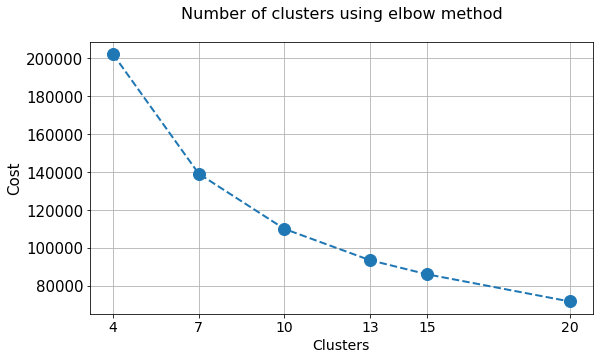

In [160]:
plt.figure(figsize=(9,5))
plt.title("Number of clusters using elbow method\n",fontsize=16)
plt.plot(Klist, cost, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.grid(True)
plt.xlabel("Clusters",fontsize=14)
plt.ylabel("Cost",fontsize=15)
plt.xticks(Klist,fontsize=14)
plt.yticks(fontsize=15)
plt.show()

#### Optimal Number of clusters: 
It can be seen that there is an elbow joint when number of clusters is 10 , therefore the optimal number of clusters is 10

In [166]:
def GetDistance( centroid ,  centroids , k__ ):
    
    distances = [np.linalg.norm(centroids[k] - centroid) for k in range(k__) 
    if np.linalg.norm(centroids[k] - centroid) != 0.0]
                 
    return distances

In [167]:
def GetIntraDistance(  clusters, centroid ):
    
    distances =  [np.linalg.norm(clusters[i] - centroid) for i in range(len(clusters)) 
    if np.linalg.norm(clusters[i] - centroid) != 0.0]
    
    return distances

In [168]:
def GetDistanceMeasurment( clusters, centroid , centroids , k_val  , measurment_model ):
    
    if( measurment_model =='inter' ):
        distances = [np.linalg.norm(centroids[k] - centroid) for k in range(k_val) 
                     if np.linalg.norm(centroids[k] - centroid) != 0.0]
    
    if( measurment_model == 'intra'):
        distances =  [np.linalg.norm(clusters[i] - centroid) for i in range(len(clusters)) 
                      if np.linalg.norm(clusters[i] - centroid) != 0.0]
    
    
    
    return distances
    
    
    

In [169]:
def nearest(centroid, centroids, kval , clusters):
    
    dist = GetDistanceMeasurment(clusters , centroid , centroids , kval , 'inter' )
    return min(dist)

def mean_intra(clusters, centroid , centroids , kval ):
    dist = GetDistanceMeasurment(clusters , centroid , centroids , kval , 'intra' )
    return sum(dist)/len(dist)


In [170]:
## silhouette implementation 
list_k = [4,7,10, 13,15, 20 ]
value = []
for k in list_k:
    start = time.time()
    model = Kmeans(k=k)
        
        
        
    model.fit(x_train , training =True)
    cost = 0
    for i in range(k):
            X = mean_intra(model.clusters[i], model.centroids[i]  , model.centroids , k )
            Y = nearest(model.centroids[i], model.centroids, k , model.clusters )
            temp = (Y - X)/max(X, Y)
            cost += temp
    value.append(cost/k)
    end = time.time()
    print(f"for {k} clusters, time taken = {(end-start)} seconds")
    



for 4 clusters, time taken = 67.23749279975891 seconds
for 7 clusters, time taken = 112.52628207206726 seconds
for 10 clusters, time taken = 158.9317810535431 seconds
for 13 clusters, time taken = 203.61732125282288 seconds
for 15 clusters, time taken = 228.54487538337708 seconds
for 20 clusters, time taken = 304.1462314128876 seconds


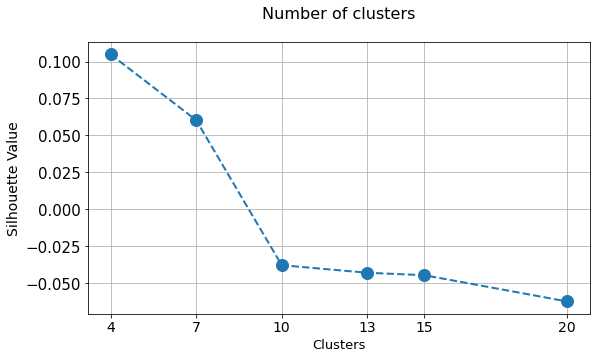

In [171]:
kmean = value 
plt.figure(figsize=(9,5))
plt.title("Number of clusters\n",fontsize=16)
plt.plot(list_k, kmean, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.grid(True)
plt.xlabel("Clusters",fontsize=13)
plt.ylabel("Silhouette Value",fontsize=14)
plt.xticks(list_k,fontsize=14)
plt.yticks(fontsize=15)
plt.show()

#### Optimal Number of clusters: 
It can be seen that there is an elbow joint when number of clusters is 10 , therefore the optimal number of clusters is 10

In [172]:
from sklearn.metrics.cluster import homogeneity_score

preds = model.prediction(x_test)
pred = np.asarray(preds, dtype=np.uint8)

homogeneity_score(testY, pred)

0.6106717021731117

In [173]:
from sklearn.metrics import classification_report
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       0.82      0.43      0.57      1000
           1       0.14      0.08      0.11      1000
           2       0.44      0.15      0.23      1000
           3       0.84      0.41      0.55      1000
           4       0.05      0.03      0.03      1000
           5       0.82      0.36      0.50      1000
           6       0.02      0.01      0.01      1000
           7       0.00      0.00      0.00      1000
           8       0.01      0.01      0.01      1000
           9       0.00      0.00      0.00      1000
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/home/sudarshan/Documents/Mobile Robotics/SMAI_project/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sudarshan/Documents/Mobile Robotics/SMAI_project/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sudarshan/Documents/Mobile Robotics/SMAI_project/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

In [174]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(x_test)

/home/sudarshan/Documents/Mobile Robotics/SMAI_project/SMAI/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sudarshan/Documents/Mobile Robotics/SMAI_project/SMAI/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 2.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 454.347646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.536110
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

In [179]:
test = {'one': tsne_results[:,0],  
           'two': tsne_results[:,1],
           'y': pred}

<AxesSubplot:xlabel='one', ylabel='two'>

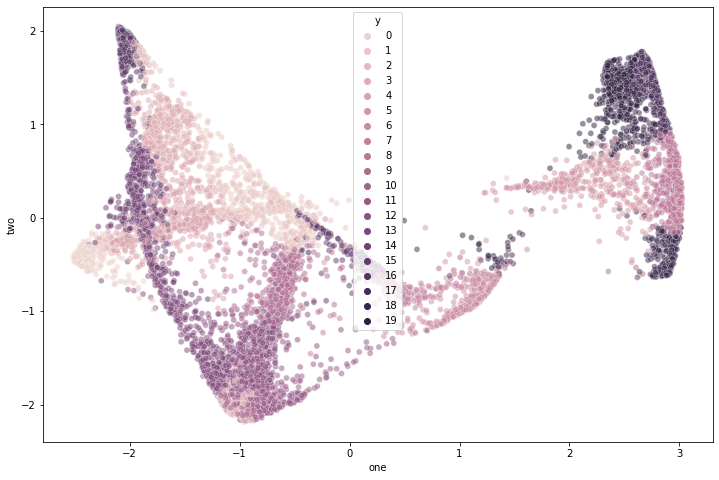

In [180]:
test = pd.DataFrame(test)

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="one", y="two",
    hue="y",
#     palette=sns.color_palette("hls", 10),
    data=test,
    legend="full",
    alpha=0.5
)

## Hierarchical clustering

In [181]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np


In [182]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()


X_train = trainX.reshape((trainX.shape[0], 28*28))
X_test = testX.reshape((testX.shape[0], 28*28))


x_train = X_train[:10000,:]
x_test = X_test[:1000,:]
y_train = trainy[:10000]
y_test = testy[:1000]

In [183]:
def HClustering(hclust, true_labels,n_clusters , Hcluster ):
    
    if(Hcluster == True ):
        labels_results = {}

        for i in range(n_clusters):

            labels = []
            index = np.where(hclust.labels_ == i)
            labels.append(true_labels[index])
            if len(labels[0]) == 1:
                counts = np.bincount(labels[0])
            else:
                counts = np.bincount(np.squeeze(labels))
            if np.argmax(counts) in labels_results:
                labels_results[np.argmax(counts)].append(i)
            else:
                labels_results[np.argmax(counts)] = [i]
        
    return labels_results  

def PredictLabels(hc_pred, labeled_clusters , predict):
    if( predict == True):
        predicted_y = np.zeros(len(hc_pred)).astype(np.uint8)

        for i, cluster in enumerate(hc_pred):
            for key, value in labeled_clusters.items():
                if cluster in value:
                    predicted_y[i] = key
                
    return predicted_y

In [184]:
def SigleLinkage():
    
    plt.figure(figsize=(22,10))
    dendrogram(linkage(x_train,method = 'single'),
            orientation='top',
            truncate_mode = 'lastp')
    
    plt.title("Dendogram for single linkage")
    plt.show()
    
    n_clusters=31 
    Hclust_single = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='single' ,
                                            )  
    Hclust_single.fit(x_train) 
    
    labeled_clusters = HClustering(Hclust_single, y_train,n_clusters , Hcluster= True )
    PredY = Hclust_single.fit_predict(x_train)
    PredYSingle = PredictLabels(PredY, labeled_clusters , predict = True )
    
    print(accuracy_score(PredYSingle,y_train))
    
    return PredYSingle


In [185]:
def CompleteLinkage():
    
    plt.figure(figsize=(22,10))
    dendrogram(linkage(x_train,method = 'complete'),
            orientation='top',
            truncate_mode = 'lastp')
    
    plt.title("Dendogram for single linkage")
    plt.show()
    
    n_clusters= 31
    Hclust_complete = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='complete' 
                                              )  
    Hclust_complete.fit(x_train  ) 
    labeled_clusters = HClustering(Hclust_complete, y_train,n_clusters , Hcluster = True)
    predy = Hclust_complete.fit_predict(x_train)
    pred_y_complete = PredictLabels(predy, labeled_clusters , predict = True )
    
    
    print(accuracy_score(pred_y_complete,y_train))
    
    return pred_y_complete
    

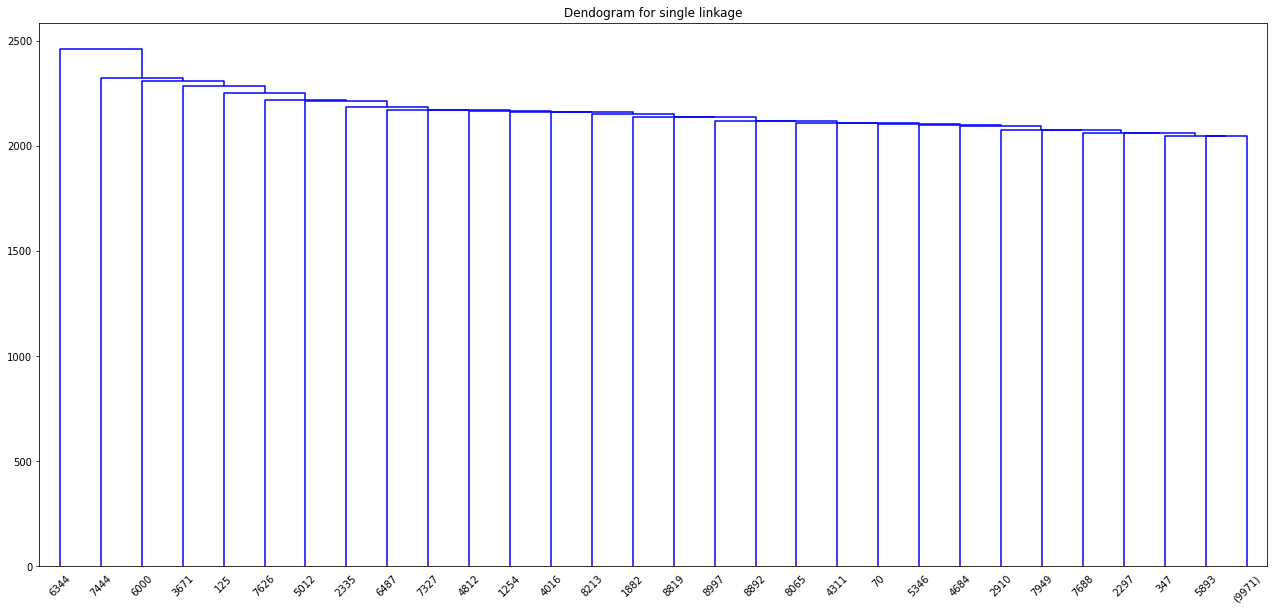

0.1057


In [186]:
Predict_single = SigleLinkage()

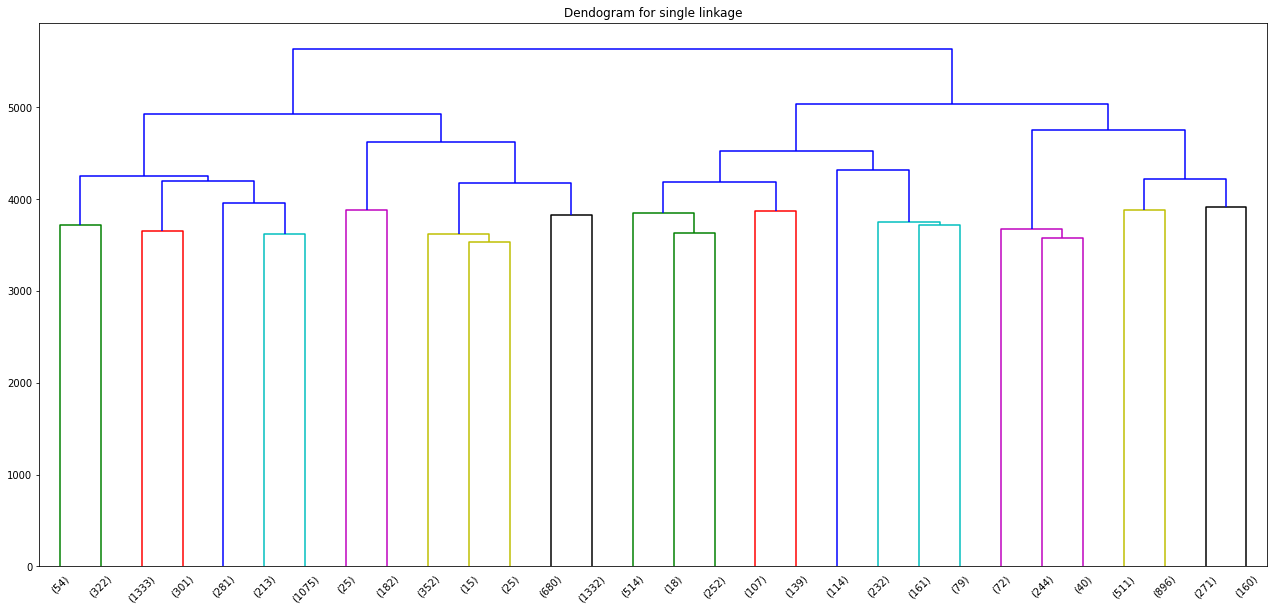

0.5714


In [187]:
predict_complete = CompleteLinkage()

**Question**: Procedure to find the optimal number of clusters using dendogram


Answer: A dendogram represents the number of merges or splits that are obtained in hierarchical clustering, it is tree like structure of graphical representation. 

</br>
At mergers the dendogram records the distance between nodes and is represented as a graph. The distance between the points is propotional to the height between the nodes, this is repeated for all steps where clusters merge and we get dendograms as shown above. Here, a threshold is set ( commonly its a line that cuts the tallest vertical line) and a horizontal line is drawn, and the number of clusters will be the intersections of the horizontal line using the threshold.  
</br>



#### Complete Linkage visulization 

In [188]:
test = {'one': tsne_results[:,0],  
           'two': tsne_results[:,1],
           'y': predict_complete}

<AxesSubplot:xlabel='one', ylabel='two'>

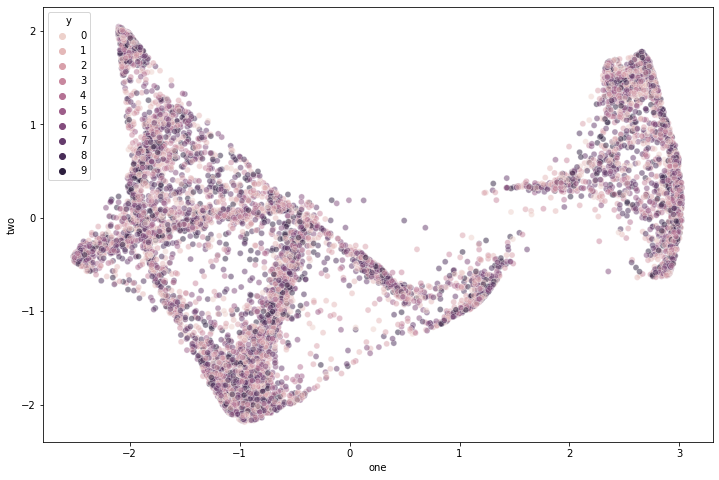

In [189]:
test = pd.DataFrame(test)

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="one", y="two",
    hue="y",
#     palette=sns.color_palette("hls", 10),
    data=test,
    legend="full",
    alpha=0.5
)

#### Single Linkage visulization 

In [190]:
test = {'one': tsne_results[:,0],  
           'two': tsne_results[:,1],
           'y': Predict_single}

<AxesSubplot:xlabel='one', ylabel='two'>

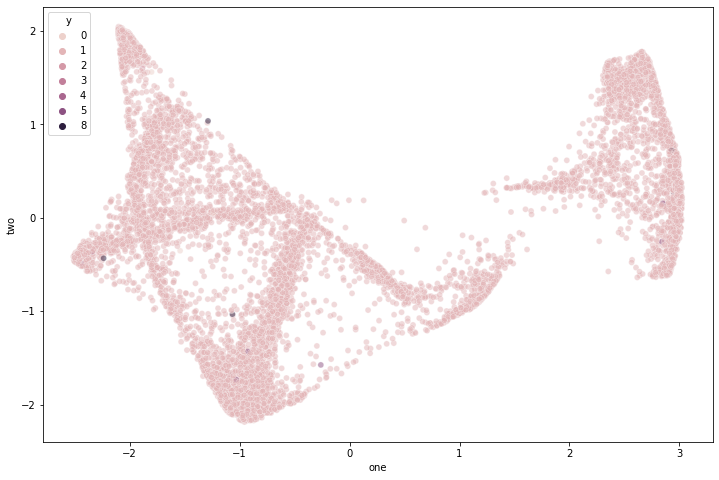

In [191]:
test = pd.DataFrame(test)

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="one", y="two",
    hue="y",
#     palette=sns.color_palette("hls", 8),
    data=test,
    legend="full",
    alpha=0.5
)

### Comparision 
We can observe a increase in the accuracy, the complete linkage has an accuracy of 57% whare as the the single linkage accuracy is about 10% 